<a href="https://colab.research.google.com/github/offdocudev/Machine-Learning/blob/master/Chatroom_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import math
from IPython.display import clear_output

# DATA - https://www.kaggle.com/c/digit-recognizer/data
# Kaggle 
! pip install kaggle
! mkdir ~/.kaggle
#! cp kaggle.json ~/.kaggle/
# Or manually copy credentials in kaggle.json file 

!  echo '{"username":"offdocudev","key":"a6893bc3aa38aec8a688959083e82644"}' > /root/.kaggle/kaggle.json


! cat /root/.kaggle/kaggle.json
! chmod 600 /root/.kaggle/kaggle.json

#################### DOWNLOAD AND UNZIP FILE SAVED IN DRIVE ####################

!pip install -U -q PyDrive

# HERE YOUR FILE ID ( GET IT WITH THE SHARING URL: https://drive.google.com/open?id=1Soh3zXLXt2lT7b_3FcWWyeOCC7SnOxK0 )
zip_id = '1Soh3zXLXt2lT7b_3FcWWyeOCC7SnOxK0'

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
import zipfile, os

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)




Using TensorFlow backend.


{"username":"offdocudev","key":"a6893bc3aa38aec8a688959083e82644"}
    100% |████████████████████████████████| 993kB 20.9MB/s 


In [0]:
!kaggle datasets download -d freecodecamp/all-posts-public-main-chatroom

 97% 581M/597M [00:05<00:00, 116MB/s]
100% 597M/597M [00:05<00:00, 116MB/s]


In [0]:
zip_ref = zipfile.ZipFile('all-posts-public-main-chatroom.zip','r')
zip_ref.extractall()
zip_ref.close()

In [0]:
import pandas as pd
import numpy as np

chat = pd.read_csv('freecodecamp_casual_chatroom.csv', usecols = ['fromUser.id', 'text'])

In [0]:
chat.head()

,fromUser.id,text
0,546fd99cdb8155e6700d6ec8,no legumes either
1,54a47e0cdb8155e6700e486e,That bullet proof coffee sounds insane.
2,54a47e0cdb8155e6700e486e,That guy has huge eyes.
3,546fd99cdb8155e6700d6ec8,@janetwalters008 It is. but it works. some peo...
4,54a44bbbdb8155e6700e47de,They guy that came up with the idea is kind of...


In [0]:
chat = chat[chat['fromUser.id'] != '55b977f00fc9f982beab7883']

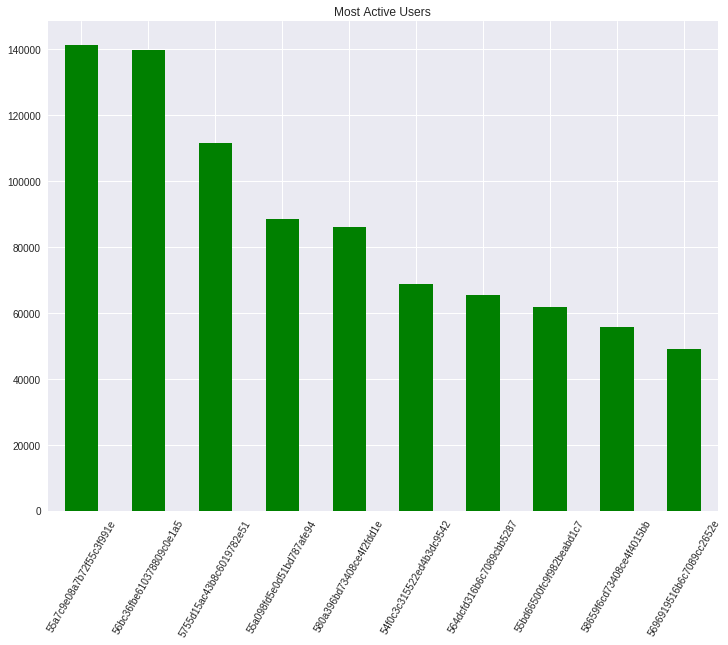

In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

f,g = plt.subplots(figsize = (12,9))
chat['fromUser.id'].value_counts().head(10).plot.bar(color = 'green')
g.set_xticklabels(g.get_xticklabels(),rotation = 60)
plt.title('Most Active Users')
plt.show()

In [0]:
chat[chat['fromUser.id'] =='55a7c9e08a7b72f55c3f991e'].text.head(20)

224937    Hello... I heard about Free Code Camp via Life...
224977    So, just going through the prescribed steps (h...
225004    Looking for some idea on the average amount of...
225053    ok, I found the documentation (I'm new) on the...
225099    at what point does pair coding come into the p...
247053    do some amount of BASH here as well. Have to s...
247090    With all of the various frameworks (even some ...
247105    I'd like to see more variety in design as well...
247114    does the sameness (not specifically Bootstrap,...
247126    I've found that compiling a list (your own + l...
247127                                       syntax that is
253298    I find geany to be pretty solid (as far as edi...
253324    I'd imagine if you had experience programming ...
253325                                            edit: too
253912    I think (in addition to Monospace vs. Monotype...
253918          good to hear. CSS is more forgiving than js
253924    Very true. Sloppy code not onl

In [0]:
user = chat[chat['fromUser.id'] == '55a7c9e08a7b72f55c3f991e'].text

n_messages = len(user)
n_chars = len(' '.join(map(str,user)))
print("55a7c9e08a7b72f55c3f991e accounts for %d messages" % n_messages)
print("Their messages add up to %d characters" % n_chars)

55a7c9e08a7b72f55c3f991e accounts for 141362 messages
Their messages add up to 7407104 characters


In [0]:
sample_size = int(len(user) * 0.2)

user = user[:sample_size]
user = ' '.join(map(str,user)).lower()
user[:100]


chars = sorted(list(set(user)))
print('Characters : ',len(chars))

char_indices = dict((c,i) for i,c in enumerate(chars))
indices_char = dict((i,c) for i,c in enumerate(chars))

Characters :  149


In [0]:
maxlen = 40
step = 3
sentences = []
next_chars = []


for i in range(0,len(user) - maxlen,step):
  sentences.append(user[i: i+maxlen])
  next_chars.append(user[i+maxlen])

print('Number of Sequences = ',len(sentences),'\n',sentences[:5],'\n')
print('Char : ',next_chars[:5])

Number of Sequences =  490695 
 ['hello... i heard about free code camp vi', 'lo... i heard about free code camp via l', '.. i heard about free code camp via life', 'i heard about free code camp via lifehac', 'eard about free code camp via lifehacker'] 

Char :  ['a', 'i', 'h', 'k', ' ']


In [0]:
x = np.zeros((len(sentences),maxlen,len(chars)),dtype = np.bool)
y = np.zeros((len(sentences),len(chars)),dtype = np.bool)

for i, sentence in enumerate(sentences):
  for t,char in enumerate(sentence):
    x[i,t,char_indices[char]] = 1
    
  y[i,char_indices[next_chars[i]]] = 1

In [0]:
from keras.layers import LSTM,CuDNNLSTM,Dense,Activation,Dropout
from keras.models import Sequential

model = Sequential()
model.add(CuDNNLSTM(1024,input_shape = (maxlen,len(chars))))
model.add(Dense(len(chars),activation = 'softmax'))


Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(optimizer = 'rmsprop',loss = 'categorical_crossentropy',metrics = ['acc'])

In [0]:
import random
import sys
from keras.callbacks import LambdaCallback,ModelCheckpoint
def sample(preds,temperature = 1.0):
  preds = np.asarray(preds).astype('float64')
  
  preds = np.log(preds) /temperature
  exp_preds = np.exp(preds)
  preds = exp_preds / np.sum(exp_preds)
  probas = np.random.multinomial(1,preds,1)
  
  return np.argmax(probas)

def on_epoch_end(epoch,logs):
  if epoch+1 == 1 or epoch+1 ==15:
    print()
    print('----- Generating text after Epoch: %d' % epoch)
    
    start_index = random.randint(0,len(user) - maxlen -1)
    
    for diversity in [0.2,0.5,1.0,1.2]:
      print('----- diversity:', diversity)
      generated = ''
      sentence = user[start_index : start_index + maxlen]
      generated +=sentence
      print('----- Generating with seed: "' + sentence + '"')
      sys.stdout.write(generated)
      
      for i in range(400):
        x_pred = np.zeros((1,maxlen,len(chars)))
        
        for t,char in enumerate(sentence):
          x_pred[0,t,char_indices[char]] =1
          
        preds = model.predict(x_pred,verbose =0)[0]
        next_index = sample(preds, diversity)
        next_char = indices_char[next_index]

        generated += next_char
        sentence = sentence[1:] + next_char

        sys.stdout.write(next_char)
        sys.stdout.flush()
      print()
  else:
    print()
    print('----- Not generating text after Epoch: %d' % epoch)

generate_text = LambdaCallback(on_epoch_end=on_epoch_end)

In [0]:
filepath = "weights.hdf5"
checkpoint = ModelCheckpoint(filepath, 
                             monitor='loss', 
                             verbose=1, 
                             save_best_only=True, 
                             mode='min')

# fit model using our gpu
with tf.device('/gpu:0'):
    model.fit(x, y,
              batch_size=128,
              epochs=15,
              verbose=2,
              callbacks=[generate_text, checkpoint])

Instructions for updating:
Use tf.cast instead.
Epoch 1/15
